<h1><span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Install-Dependence" data-toc-modified-id="Install-Dependence-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Install Dependence</a></span></li><li><span><a href="#Import-Library" data-toc-modified-id="Import-Library-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Import Library</a></span></li><li><span><a href="#Show-Version" data-toc-modified-id="Show-Version-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Show Version</a></span></li><li><span><a href="#Global-Constants" data-toc-modified-id="Global-Constants-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Global Constants</a></span></li><li><span><a href="#Random-Seed" data-toc-modified-id="Random-Seed-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Random Seed</a></span></li><li><span><a href="#Prepare-Data" data-toc-modified-id="Prepare-Data-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Prepare Data</a></span><ul class="toc-item"><li><span><a href="#Train-and-Valid-Data" data-toc-modified-id="Train-and-Valid-Data-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Train and Valid Data</a></span></li><li><span><a href="#Test-Data" data-toc-modified-id="Test-Data-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Test Data</a></span></li></ul></li><li><span><a href="#Sample-Data-Exploration" data-toc-modified-id="Sample-Data-Exploration-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Sample Data Exploration</a></span><ul class="toc-item"><li><span><a href="#Demo--Image" data-toc-modified-id="Demo--Image-7.1"><span class="toc-item-num">7.1&nbsp;&nbsp;</span>Demo  Image</a></span></li><li><span><a href="#Label-Data-Distribution" data-toc-modified-id="Label-Data-Distribution-7.2"><span class="toc-item-num">7.2&nbsp;&nbsp;</span>Label Data Distribution</a></span></li><li><span><a href="#Define-Display-Image-Method" data-toc-modified-id="Define-Display-Image-Method-7.3"><span class="toc-item-num">7.3&nbsp;&nbsp;</span>Define Display Image Method</a></span></li><li><span><a href="#Display-Raw-Sample-Images" data-toc-modified-id="Display-Raw-Sample-Images-7.4"><span class="toc-item-num">7.4&nbsp;&nbsp;</span>Display Raw Sample Images</a></span></li><li><span><a href="#Data-Augment-Transform" data-toc-modified-id="Data-Augment-Transform-7.5"><span class="toc-item-num">7.5&nbsp;&nbsp;</span>Data Augment Transform</a></span></li><li><span><a href="#Display-Augment-Images" data-toc-modified-id="Display-Augment-Images-7.6"><span class="toc-item-num">7.6&nbsp;&nbsp;</span>Display Augment Images</a></span></li></ul></li><li><span><a href="#Build-Network" data-toc-modified-id="Build-Network-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Build Network</a></span><ul class="toc-item"><li><span><a href="#Load-Pretrained-Model" data-toc-modified-id="Load-Pretrained-Model-8.1"><span class="toc-item-num">8.1&nbsp;&nbsp;</span>Load Pretrained Model</a></span></li><li><span><a href="#Freezing-Partial-Layers" data-toc-modified-id="Freezing-Partial-Layers-8.2"><span class="toc-item-num">8.2&nbsp;&nbsp;</span>Freezing Partial Layers</a></span></li><li><span><a href="#Model/-Loss/Optimizer" data-toc-modified-id="Model/-Loss/Optimizer-8.3"><span class="toc-item-num">8.3&nbsp;&nbsp;</span>Model/ Loss/Optimizer</a></span></li></ul></li><li><span><a href="#Train" data-toc-modified-id="Train-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Train</a></span></li><li><span><a href="#Predict" data-toc-modified-id="Predict-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>Predict</a></span></li><li><span><a href="#Plot-Metrics" data-toc-modified-id="Plot-Metrics-11"><span class="toc-item-num">11&nbsp;&nbsp;</span>Plot Metrics</a></span></li><li><span><a href="#Submission" data-toc-modified-id="Submission-12"><span class="toc-item-num">12&nbsp;&nbsp;</span>Submission</a></span></li></ul></div>

In [1]:
! [ ! -L /kaggle ] && ln -s /data/kaggle /kaggle 

##  Install Dependence

In [2]:
!pip install pytorch_lightning GPUtil > /dev/null

You should consider upgrading via the '/usr/bin/python3.6 -m pip install --upgrade pip' command.


## Import Library

In [3]:
import os
import zipfile
import GPUtil
import random
import pytorch_lightning as pl
import numpy as np
import pandas as pd
import seaborn as sns
import torch
import torchvision
import matplotlib.pyplot as plt

from torch import nn
from torch.nn import functional as F
from torch.utils.data import (Dataset, DataLoader)
from torchvision.transforms import (
        Resize,
        Compose,
        ToTensor,
        Normalize,
        RandomOrder,
        ColorJitter,
        RandomRotation,
        RandomGrayscale,
        RandomResizedCrop,
        RandomVerticalFlip,
        RandomHorizontalFlip)

from PIL import Image, ImageDraw, ImageFont
from sklearn.model_selection import train_test_split
from pytorch_lightning.callbacks import EarlyStopping
from pytorch_lightning.callbacks import ModelCheckpoint

%matplotlib inline

sns.set(style='white', font_scale=1.2)

## Show Version

In [4]:
np.__version__, pd.__version__, sns.__version__

('1.18.5', '1.0.4', '0.10.1')

In [5]:
torch.__version__, torchvision.__version__, pl.__version__

('1.6.0.dev20200609+cu101', '0.7.0.dev20200609+cu101', '0.9.0')

## Global Constants

In [6]:
RNG_SEED = 9527
DATA_ROOT = '/kaggle/input/digit-recognizer'
WORK_ROOT = '/kaggle/working/digit-recognizer'
CKPT_PATH = f'{WORK_ROOT}/checkpoints/best.ckpt'
SUBMITCSV = '/kaggle/working/submission.csv'
FONT_PATH = '/usr/share/fonts/truetype/dejavu/DejaVuSerif-Bold.ttf'

INPUT_SIZE = 28
BATCH_SIZE = 48
NUM_CLASSES = 10

MAX_EPOCHS = 30

DATASET_MEAN = (0.1307, 0.1307, 0.1307)
DATASET_STD = (0.3081, 0.3081, 0.3081)

TEST_SPLIT = 0.3

In [7]:
!ls -l $DATA_ROOT
!mkdir -p $WORK_ROOT

total 125136
-rw-rw-r-- 1 1002 1002   240909 Dec 11  2019 sample_submission.csv
-rw-rw-r-- 1 1002 1002 51118296 Dec 11  2019 test.csv
-rw-rw-r-- 1 1002 1002 76775041 Dec 11  2019 train.csv


## Random Seed

In [8]:
torch.manual_seed(RNG_SEED)
np.random.seed(RNG_SEED)
random.seed(RNG_SEED)

torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False

## Prepare Data

In [9]:
train_df = pd.read_csv(f'{DATA_ROOT}/train.csv')

### Train and Valid Data

In [10]:
train_df, valid_df = train_test_split(train_df, test_size = TEST_SPLIT)
train_df[:2]

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
2322,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
25789,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
def preprocess_data(df):
    labels = df['label'].values
    images = np.uint8(np.array(df.drop(columns=['label'])).reshape(-1, 28, 28))
    return list(zip(labels, images))

In [12]:
train_data = preprocess_data(train_df)
valid_data = preprocess_data(valid_df)

### Test Data

In [13]:
test_df = pd.read_csv(f'{DATA_ROOT}/test.csv')

In [14]:
test_data = np.uint8(np.array(test_df).reshape(-1, 28, 28))

In [15]:
del test_df

In [16]:
print(f'Train Count: {len(train_data)}, Valid Count: {len(valid_data)}, Test Count: {len(test_data)}')

Train Count: 29400, Valid Count: 12600, Test Count: 28000


## Sample Data Exploration

### Demo  Image

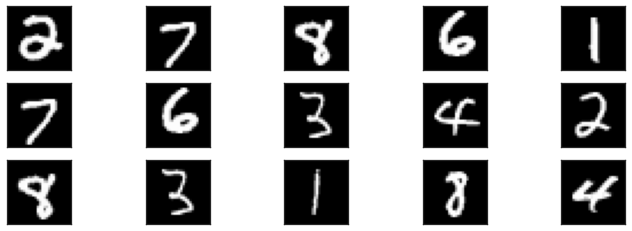

In [17]:
fig, axes = plt.subplots(nrows=3, ncols=5, sharey=True, figsize=(12,4))
C = random.randint(100, 200)
for r in range(3):
    for c in range(5):
        axes[r][c].set_xticks([])
        axes[r][c].set_yticks([])
        axes[r][c].imshow(test_data[(r+1)*(c+1) + C], cmap='gray') # 'gray_r'

### Label Data Distribution

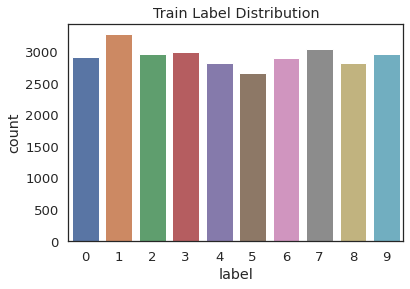

In [18]:
sns.countplot(x='label', data=train_df).set_title("Train Label Distribution")
del train_df

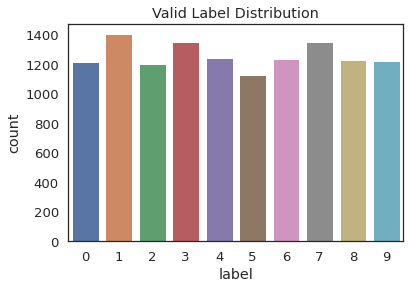

In [19]:
sns.countplot(x='label',data=valid_df).set_title("Valid Label Distribution")
del valid_df

### Define Display Image Method

In [20]:
def draw_image(imgdata, labelname, resize=None, augtrans=None):
    img = Image.fromarray(imgdata).convert('RGB')
    if resize is not None:
        img = img.resize((resize, resize))
    if augtrans is not None:
        img = augtrans(img)
        
    font_obj = ImageFont.truetype(FONT_PATH, 12)
    draw_img = ImageDraw.Draw(img)
    font = ImageFont.load_default()
    draw_img.text((0, 0), labelname, font=font_obj, fill=(0, 0, 255))
    return np.array(img)

def grid_image(imgs_list, cols=5):
    images = torch.as_tensor(imgs_list) # [(W, H, C)...] to (B, H, W, C)
    images = images.permute(0, 3, 1, 2) # (B, H, W, C) to (B, C, H, W)
    images = torchvision.utils.make_grid(images, nrow=cols) # (C, 2*H, 4*W)
    images = images.permute(1, 2, 0) # (H, W, C)
    return images

### Display Raw Sample Images

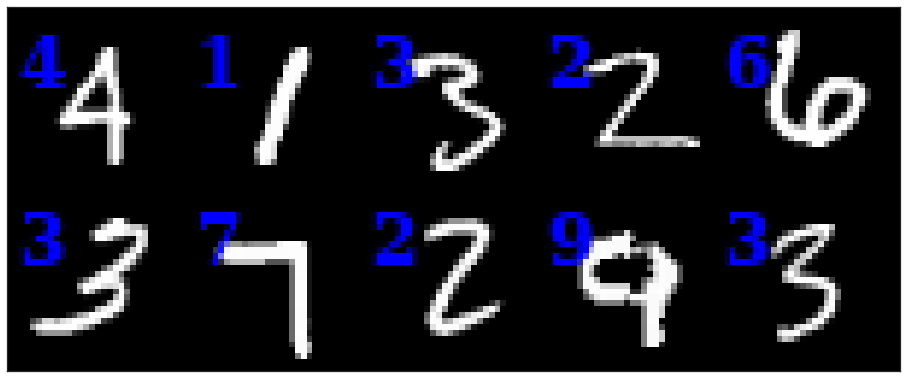

In [21]:
plt.figure(figsize=(16, 8))

images_2x5 = [
    draw_image(
        imgdata=imgdata,
        labelname=str(label),
    ) for label, imgdata in train_data[:10]
]

plt.xticks([])
plt.yticks([])
plt.imshow(grid_image(images_2x5, cols=5), cmap='gray');

### Data Augment Transform

In [22]:
aug_trans = RandomOrder([
    RandomRotation(degrees=30),
    # RandomVerticalFlip(p=0.3),
    # RandomHorizontalFlip(p=0.3),
    # ColorJitter(brightness=0.55, contrast=0.3, saturation=0.25, hue=0),
])

img_trans = Compose([
    ToTensor(),
    Normalize(mean=DATASET_MEAN, std=DATASET_STD),
])

### Display Augment Images

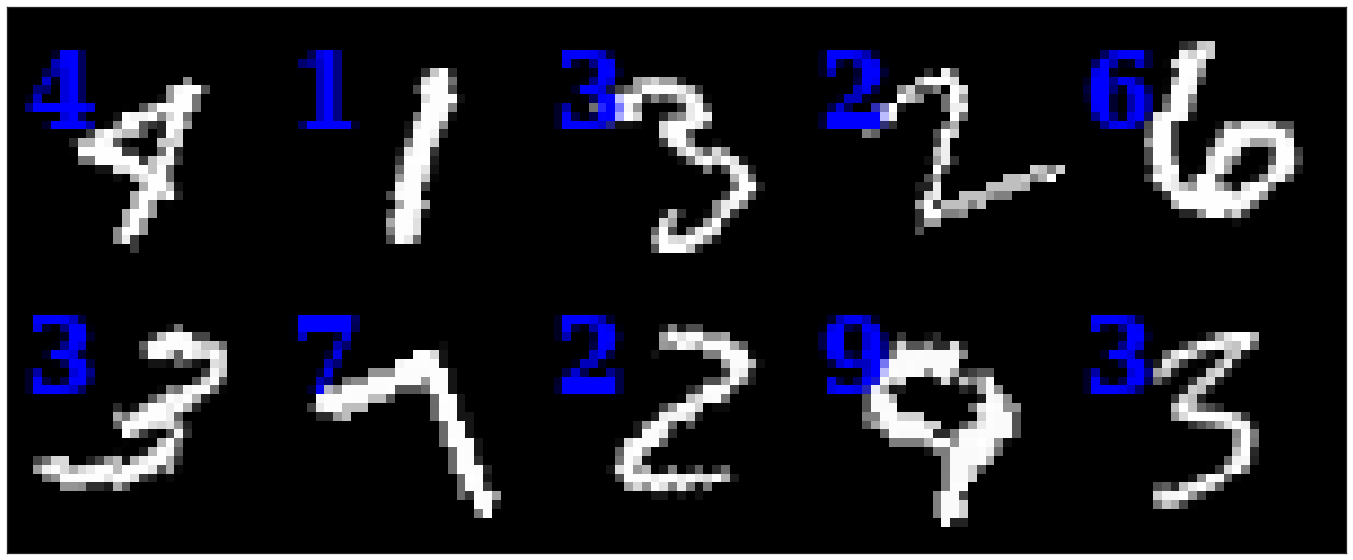

In [23]:
plt.figure(figsize=(24, 12))

trans_images_2x5 = [
    draw_image(
        imgdata=imgdata,
        labelname=str(label),
        augtrans = aug_trans
    ) for label, imgdata in train_data[:10]
]

plt.xticks([])
plt.yticks([])
plt.imshow(grid_image(trans_images_2x5, cols=5));

## Build Network

### Load Pretrained Model

In [24]:
backbone = torchvision.models.squeezenet1_1(pretrained=True)

### Freezing Partial Layers

In [25]:
fz_count = 6
for param in backbone.features.parameters():
    pass
    param.requires_grad = False
    fz_count -= 1
    if fz_count < 0:
        break

### Model/ Loss/Optimizer 

In [45]:
class DCDataset(Dataset):
    def __init__(self, data, augtrans=None, imgtrans=ToTensor()):
        super().__init__()
        self.data = data
        self.augtrans = augtrans
        self.imgtrans = imgtrans
    
    def __getitem__(self, index):
        label, imgdata = self.data[index]
        img = Image.fromarray(imgdata).convert('RGB')
        if self.augtrans:
            img = self.augtrans(img)
        img = self.imgtrans(img)
        return img, label
    
    def __len__(self):
        return len(self.data)
    
class TDCDataset(DCDataset):
    def __getitem__(self, index):
        imgdata = self.data[index]
        img = Image.fromarray(imgdata).convert('RGB')
        if self.augtrans:
            img = self.augtrans(img)
        img = self.imgtrans(img)
        return img, index+1 # id
        
class DCNet(pl.LightningModule):
    def __init__(self, extractor, num_classes=NUM_CLASSES):
        super().__init__()
        self.features = extractor
        self.classifier = nn.Sequential(
            nn.Dropout(p=0.3),
            nn.Conv2d(512, num_classes, kernel_size=1),
            nn.ReLU(inplace=True),
            nn.AdaptiveAvgPool2d(output_size=(1, 1)),
            nn.Flatten(start_dim=1, end_dim=-1)
        )
  
    def forward(self, x, *args, **kwargs):
        x = self.features(x)
        x = self.classifier(x)
        return x
        
    def setup(self, stage):
        torch.cuda.empty_cache()

    def teardown(self, stage):
        for idx, gpu in enumerate(GPUtil.getGPUs()):
            allocmem = round(torch.cuda.memory_allocated(idx) / 1024**2, 2)
            allocmax = round(torch.cuda.max_memory_allocated(idx) / 1024**2, 2)
            print(f'({stage})\tGPU-{idx} mem allocated: {allocmem} MB\t maxmem allocated: {allocmax} MB')
            
    @property
    def metrics(self):
        return self.metrics
        
    def configure_optimizers(self):
        optimizer = torch.optim.SGD(
            filter(lambda p: p.requires_grad, model.parameters()),
            lr=0.001,
        )
        scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(
            optimizer,
            mode='min',
            factor=0.1,
            patience=3,
            min_lr=1e-6)
        return [optimizer], [scheduler]
    
    def prepare_data(self):
        self.train_dataset = DCDataset(train_data, aug_trans, img_trans) 
        self.valid_dataset = DCDataset(valid_data, None, img_trans) 
        self.test_dataset = TDCDataset(test_data, None, img_trans)

    def train_dataloader(self):
        return DataLoader(
                self.train_dataset,
                batch_size=BATCH_SIZE,
                num_workers=4,
                drop_last=True,
                shuffle=True)
    
    def training_step(self, batch, batch_idx):
        x, y_true = batch
        y_pred = self(x)
        loss = F.cross_entropy(y_pred, y_true, reduction='mean')
        acc = (torch.argmax(y_pred, dim=1) == y_true).float().mean()
        return {'loss': loss, 'acc': acc}

    def training_epoch_end(self, outputs):
        loss = torch.stack([x['loss'] for x in outputs]).mean()
        acc = torch.stack([x['acc'] for x in outputs]).mean()
        METRICS['epoch'].append(self.current_epoch)
        METRICS['train_loss'].append(loss)
        METRICS['train_acc'].append(acc)
        return {'progress_bar': {'train_loss': loss, 'train_acc': acc}}

    def val_dataloader(self):
        return DataLoader(
            self.valid_dataset,
            batch_size=BATCH_SIZE,
            num_workers=4,
            drop_last=False,
            shuffle=False)
    
    def validation_step(self, batch, batch_idx):
        x, y_true = batch
        y_pred = self(x)
        loss = F.cross_entropy(y_pred, y_true, reduction='mean')
        acc = (torch.argmax(y_pred, dim=1) == y_true).float().mean()
        return {'val_loss': loss, 'val_acc': acc}

    def validation_epoch_end(self, outputs):
        loss = torch.stack([x['val_loss'] for x in outputs]).mean()
        acc = torch.stack([x['val_acc'] for x in outputs]).mean()
        METRICS['val_loss'].append(loss)
        METRICS['val_acc'].append(acc)
        return {'progress_bar': {'val_loss': loss, 'val_acc': acc}}
    
    def test_dataloader(self):
        return DataLoader(
            self.test_dataset,
            batch_size=BATCH_SIZE,
            num_workers=4,
            drop_last=False,
            shuffle=False)
    
    def test_step(self, batch, batch_idx):
        x, imgid = batch
        y_pred = torch.argmax(self(x), dim=1).cpu().numpy()
        log = {'imgid': imgid.cpu().numpy(), 'label': y_pred}
        return log

    def test_epoch_end(self, outputs):
        imgid = np.concatenate([x['imgid'] for x in outputs])
        label = np.concatenate([x['label'] for x in outputs])
        return {'id': imgid, 'label': label}
    
class DCTrainer(pl.Trainer):
    def __init__(self, *args, **kwargs):
        super().__init__(*args, **kwargs)
        
    def save_checkpoint(self, filepath, weights_only: bool = False):
        return super().save_checkpoint(CKPT_PATH, weights_only)

    def on_validation_start(self):
        lrs = []
        for scheduler in self.lr_schedulers:
            ss = scheduler['scheduler']
            if isinstance(ss, torch.optim.lr_scheduler.ReduceLROnPlateau):
                for i, param_group in enumerate(ss.optimizer.param_groups):
                    lrs.append(np.float32(param_group['lr']))
            else:
                lrs.extend([np.float32(x) for x in ss.get_lr()])
        self.add_progress_bar_metrics({'lr': lrs})
        return super().on_validation_start()

## Train

In [46]:
trainer = DCTrainer(
    max_epochs=MAX_EPOCHS,
    logger=False,
    log_gpu_memory='min_max',
    weights_summary='top',
    num_sanity_val_steps=0,
    progress_bar_refresh_rate=1,
    check_val_every_n_epoch=1,
    default_root_dir=WORK_ROOT,
    resume_from_checkpoint=CKPT_PATH if os.path.exists(CKPT_PATH) else None,
    early_stop_callback=EarlyStopping(monitor='val_loss', patience=7, mode='min'),
    checkpoint_callback=ModelCheckpoint(monitor='val_loss', period=5, mode='min'),
    gpus=[0],
)

model = DCNet(backbone.features, num_classes=NUM_CLASSES)

GPU available: True, used: True
TPU available: False, using: 0 TPU cores
CUDA_VISIBLE_DEVICES: [0]


In [ ]:
METRICS = {
    'epoch':[],
    'train_loss':[],
    'train_acc':[],
    'val_acc':[],
    'val_loss':[],
}
trainer.fit(model);


  | Name       | Type       | Params
------------------------------------------
0 | features   | Sequential | 722 K 
1 | classifier | Sequential | 5 K   


## Predict

In [29]:
result = trainer.test(model, verbose=False, ckpt_path=CKPT_PATH)


(fit)	GPU-0 mem allocated: 5.54 MB	 maxmem allocated: 16.83 MB
(test)	GPU-0 mem allocated: 5.54 MB	 maxmem allocated: 16.83 MB


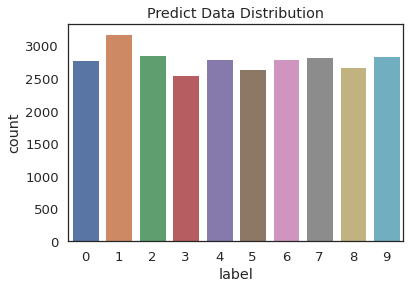

In [30]:
result_df = pd.DataFrame(data=result[0])
sns.countplot(x='label',data=result_df).set_title("Predict Data Distribution");

## Plot Metrics

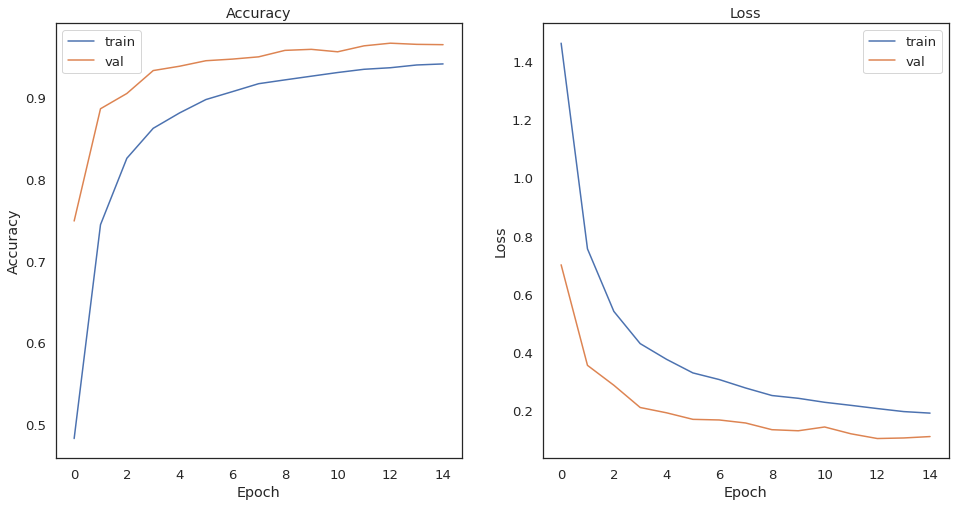

In [31]:
num_epoch = len(METRICS['epoch'])
fig, axs = plt.subplots(1, 2, figsize=(16, 8))
axs[0].plot(METRICS['epoch'], METRICS['train_acc'])
axs[0].plot(METRICS['epoch'], METRICS['val_acc'])
axs[0].set_title('Accuracy')
axs[0].set_ylabel('Accuracy')
axs[0].set_xlabel('Epoch')
axs[0].legend(['train', 'val'], loc='best')

axs[1].plot(METRICS['epoch'], METRICS['train_loss'])
axs[1].plot(METRICS['epoch'], METRICS['val_loss'])
axs[1].set_title('Loss')
axs[1].set_ylabel('Loss')
axs[1].set_xlabel('Epoch')
axs[1].legend(['train', 'val'], loc='best');

In [32]:
print(METRICS)

{'epoch': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14], 'train_loss': [tensor(1.4620, device='cuda:0'), tensor(0.7557, device='cuda:0'), tensor(0.5410, device='cuda:0'), tensor(0.4303, device='cuda:0'), tensor(0.3764, device='cuda:0'), tensor(0.3297, device='cuda:0'), tensor(0.3069, device='cuda:0'), tensor(0.2779, device='cuda:0'), tensor(0.2521, device='cuda:0'), tensor(0.2425, device='cuda:0'), tensor(0.2288, device='cuda:0'), tensor(0.2183, device='cuda:0'), tensor(0.2073, device='cuda:0'), tensor(0.1969, device='cuda:0'), tensor(0.1916, device='cuda:0')], 'train_acc': [tensor(0.4826, device='cuda:0'), tensor(0.7443, device='cuda:0'), tensor(0.8256, device='cuda:0'), tensor(0.8622, device='cuda:0'), tensor(0.8811, device='cuda:0'), tensor(0.8974, device='cuda:0'), tensor(0.9071, device='cuda:0'), tensor(0.9168, device='cuda:0'), tensor(0.9215, device='cuda:0'), tensor(0.9260, device='cuda:0'), tensor(0.9305, device='cuda:0'), tensor(0.9345, device='cuda:0'), tensor(0.9364, de

## Submission 

In [33]:
result_df.to_csv(SUBMITCSV, index=False)

In [34]:
!ls -l 
# !rm -rf $CKPT_PATH

total 3344
-rw-rw-rw- 1 root root  152058 Sep 24 00:04 digit-recognizer.ipynb
-rw-rw-rw- 1 root root 3264904 Sep 23 23:02 dogs-vs-cats.ipynb
